In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import linregress, pearsonr

## Possesion

In [2]:
possession = pd.read_csv('team/possession_premier_league_stats.csv')
possession = possession.drop(columns=['Unnamed: 0'])
possession.index = possession.index + 1
possession 

,Squad,Position,Poss#,Att 3rd#,Mid 3rd#,Def 3rd#,PrgC#,Succ%#,Poss,90s,...,Tkld,Tkld%,Carries,PrgDist,PrgC,1/3,CPA,Mis,Dis,PrgR
1,Wolves,13,9,13,12,2,12,1,49.9,38.0,...,302,39.1,12373,35065,610,421,142,516,327,1331
2,Manchester City,1,1,1,1,14,1,2,64.7,38.0,...,239,33.9,19122,56216,988,754,279,406,298,2054
3,Southampton,20,15,14,15,12,13,3,44.5,38.0,...,318,41.9,11324,29821,588,453,131,567,400,1112
4,Brighton,6,3,4,3,9,4,4,60.2,38.0,...,279,38.4,16331,43965,809,547,250,558,324,1828
5,Leicester City,18,12,18,8,4,14,5,47.7,38.0,...,245,39.5,12503,31619,580,363,175,548,313,1294
6,Crystal Palace,11,14,12,11,10,15,6,46.3,38.0,...,314,40.1,11687,30015,556,393,206,643,457,1238
7,Arsenal,2,4,2,5,20,3,7,59.3,38.0,...,290,38.6,15924,44202,824,583,281,526,378,2024
8,Liverpool,5,2,3,2,5,5,8,60.8,38.0,...,282,40.8,17146,41527,719,569,234,584,413,1974
9,Tottenham,8,8,10,7,1,8,9,50.0,38.0,...,288,43.2,13679,36842,692,465,189,521,356,1436
10,Everton,17,17,16,17,16,18,10,42.8,38.0,...,296,44.2,10479,27858,500,391,137,605,300,1042


### Possession Percentage

In [3]:
poss_pct = possession.sort_values(by='Poss', ascending=False)
poss_pct.reset_index(drop=True, inplace=True)
poss_pct.index = poss_pct.index + 1
poss_pct.loc[:5, ['Squad', 'Poss']]

,Squad,Poss
1,Manchester City,64.7
2,Liverpool,60.8
3,Brighton,60.2
4,Arsenal,59.3
5,Chelsea,58.7


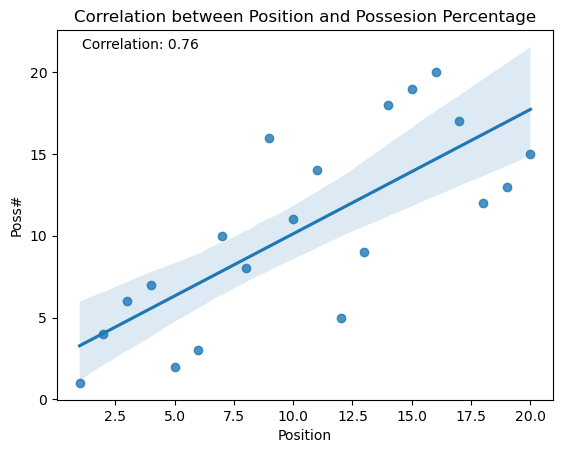

In [4]:
correlation = possession['Position'].corr(possession['Poss#'])

sns.regplot(x='Position', y='Poss#', data=possession)

plt.xlabel('Position')
plt.ylabel('Poss#')
plt.title('Correlation between Position and Possesion Percentage')


plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.show()


### Touches in Attacking Third

In [5]:
att3rd_possesion = possession.sort_values(by='Att 3rd', ascending=False).reset_index(drop=True)
att3rd_possesion.index = att3rd_possesion.index + 1
att3rd_possesion.loc[:5, ['Squad', 'Att 3rd']]

,Squad,Att 3rd
1,Manchester City,8301
2,Arsenal,8015
3,Liverpool,7149
4,Brighton,6873
5,Chelsea,6850


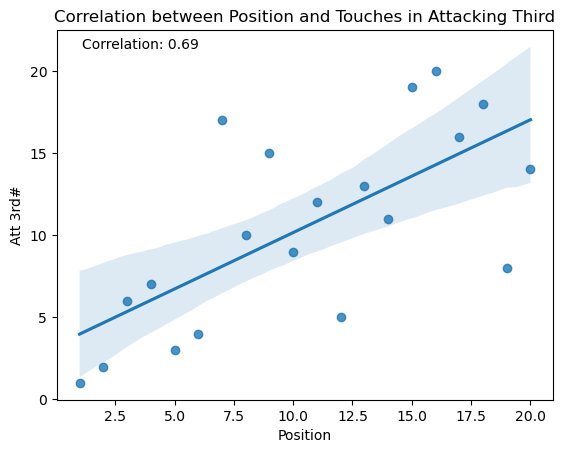

In [6]:
correlation = possession['Position'].corr(possession['Att 3rd#'])

sns.regplot(x='Position', y='Att 3rd#', data=possession)

plt.xlabel('Position')
plt.ylabel('Att 3rd#')
plt.title('Correlation between Position and Touches in Attacking Third')


plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.show()

### Touches in MIddle Third

In [7]:
mid3rd_possesion = possession.sort_values(by='Mid 3rd', ascending=False).reset_index(drop=True)
mid3rd_possesion.index = mid3rd_possesion.index + 1
mid3rd_possesion.loc[:5, ['Squad', 'Mid 3rd']]

,Squad,Mid 3rd
1,Manchester City,14372
2,Liverpool,13329
3,Brighton,12213
4,Chelsea,12057
5,Arsenal,11452


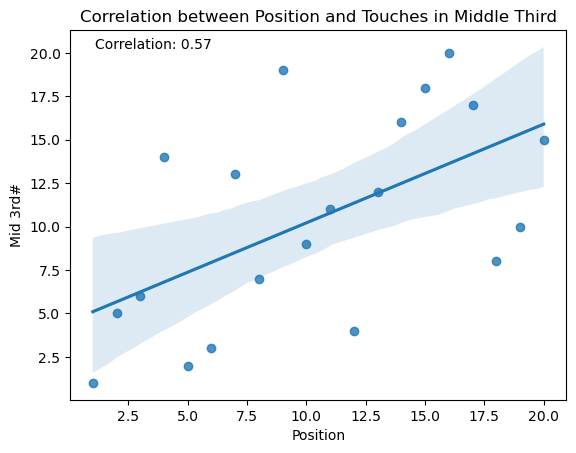

In [8]:
correlation = possession['Position'].corr(possession['Mid 3rd#'])

sns.regplot(x='Position', y='Mid 3rd#', data=possession)

plt.xlabel('Position')
plt.ylabel('Mid 3rd#')
plt.title('Correlation between Position and Touches in Middle Third')


plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.show()

### Touches in Defensive Third

In [9]:
def3rd_possession = possession.sort_values(by='Def 3rd', ascending=False).reset_index(drop=True)
def3rd_possession.index = def3rd_possession.index + 1
def3rd_possession.loc[:5, ['Squad', 'Def 3rd']]

,Squad,Def 3rd
1,Tottenham,8571
2,Wolves,8544
3,Chelsea,8461
4,Leicester City,8408
5,Liverpool,8119


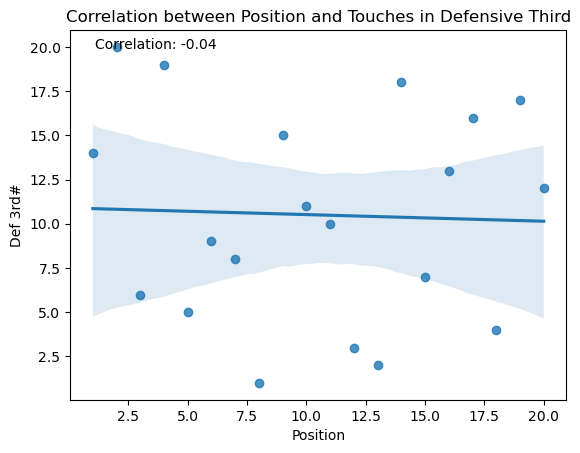

In [10]:
correlation = possession['Position'].corr(possession['Def 3rd#'])

sns.regplot(x='Position', y='Def 3rd#', data=possession)

plt.xlabel('Position')
plt.ylabel('Def 3rd#')
plt.title('Correlation between Position and Touches in Defensive Third')


plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.show()

### Progressive Carries

In [11]:
progressive_carries = possession.sort_values(by='PrgC', ascending=False).reset_index(drop=True)
progressive_carries.index = progressive_carries.index + 1
progressive_carries.loc[:5, ['Squad', 'PrgC']]

,Squad,PrgC
1,Manchester City,988
2,Chelsea,829
3,Arsenal,824
4,Brighton,809
5,Liverpool,719


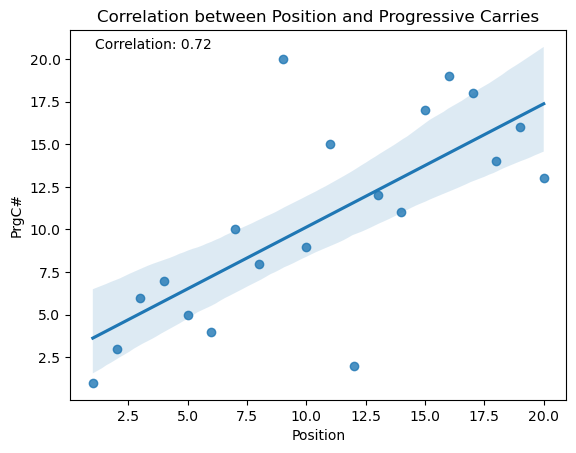

In [12]:
correlation = possession['Position'].corr(possession['PrgC#'])

sns.regplot(x='Position', y='PrgC#', data=possession)

plt.xlabel('Position')
plt.ylabel('PrgC#')
plt.title('Correlation between Position and Progressive Carries')


plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.show()

### Take on Percentage

In [13]:
take_on = possession.sort_values(by='Succ%', ascending=False).reset_index(drop=True)
take_on.index = take_on.index + 1
take_on.loc[:10, ['Squad', 'Succ%']]

,Squad,Succ%
1,Wolves,48.6
2,Manchester City,47.7
3,Southampton,47.6
4,Brighton,47.5
5,Leicester City,46.9
6,Crystal Palace,46.8
7,Arsenal,46.7
8,Liverpool,46.3
9,Tottenham,45.9
10,Everton,45.6


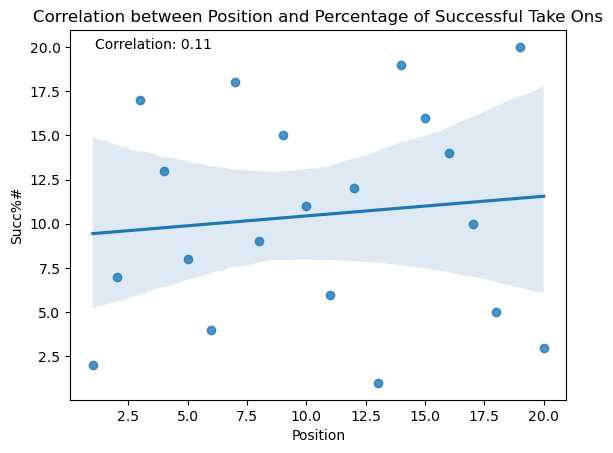

In [15]:
correlation = possession['Position'].corr(possession['Succ%#'])

sns.regplot(x='Position', y='Succ%#', data=possession)

plt.xlabel('Position')
plt.ylabel('Succ%#')
plt.title('Correlation between Position and Percentage of Successful Take Ons')


plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.show()